In [2]:
import math

In [3]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [4]:
# Test the sigmoid function with different values of x
print(sigmoid(0))    # Output: 0.5
print(sigmoid(2))    # Output: 0.8807970779778823
print(sigmoid(-2))   # Output: 0.11920292202211755

0.5
0.8807970779778823
0.11920292202211755


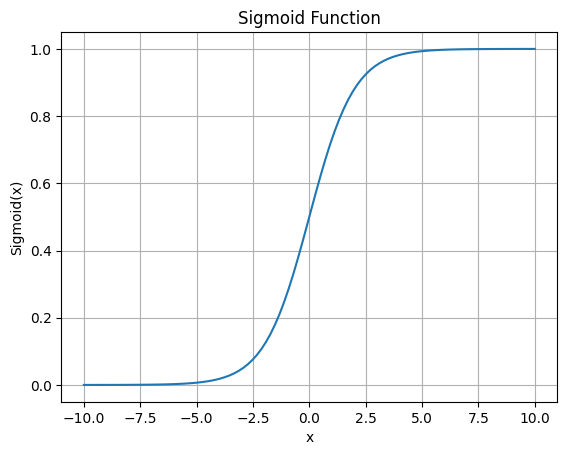

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate an array of x values
x_values = np.linspace(-10, 10, 100)

# Apply the sigmoid function to each x value
y_values = [sigmoid(x) for x in x_values]

# Plot the results
plt.plot(x_values, y_values)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.grid(True)
plt.show()

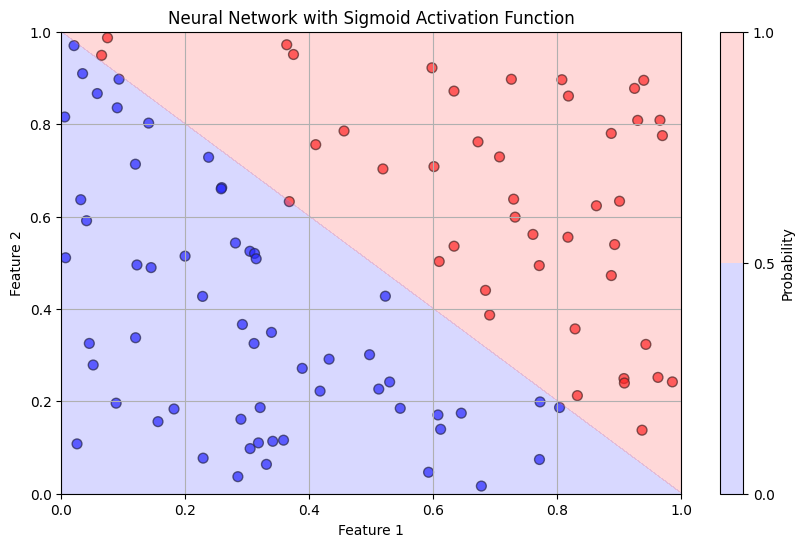

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary target based on feature sum

# Initialize network parameters
input_layer_size = X.shape[1]
hidden_layer_size = 4
output_layer_size = 1

# Randomly initialize weights
np.random.seed(42)
weights_input_hidden = np.random.rand(input_layer_size, hidden_layer_size)
weights_hidden_output = np.random.rand(hidden_layer_size, output_layer_size)
bias_hidden = np.random.rand(hidden_layer_size)
bias_output = np.random.rand(output_layer_size)

# Training parameters
learning_rate = 0.1
epochs = 10000

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)
    
    # Compute the error
    error = y.reshape(-1, 1) - output_layer_output
    
    # Backward pass
    output_layer_error = error * sigmoid_derivative(output_layer_input)
    hidden_layer_error = np.dot(output_layer_error, weights_hidden_output.T) * sigmoid_derivative(hidden_layer_input)
    
    # Update weights and biases
    weights_hidden_output += learning_rate * np.dot(hidden_layer_output.T, output_layer_error)
    bias_output += learning_rate * np.sum(output_layer_error, axis=0)
    weights_input_hidden += learning_rate * np.dot(X.T, hidden_layer_error)
    bias_hidden += learning_rate * np.sum(hidden_layer_error, axis=0)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Forward pass through the trained network
hidden_layer_input = np.dot(grid_points, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
decision_values = sigmoid(output_layer_input).reshape(xx.shape)

# Plot the dataset and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=50, alpha=0.7)
plt.contourf(xx, yy, decision_values, alpha=0.3, cmap='bwr', levels=[0, 0.5, 1])
plt.title('Neural Network with Sigmoid Activation Function')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Probability')
plt.grid(True)
plt.show()



### 1. Import Libraries

```python
import numpy as np
import matplotlib.pyplot as plt
```
- `numpy` is used for numerical operations and array manipulations.
- `matplotlib.pyplot` is used for plotting graphs.

### 2. Define the Sigmoid Function and Its Derivative

```python
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
```
- **`sigmoid(x)`**: Computes the sigmoid activation function, which maps input values to a range between 0 and 1.
- **`sigmoid_derivative(x)`**: Computes the derivative of the sigmoid function, useful for backpropagation during training.

### 3. Generate Synthetic Dataset

```python
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary target based on feature sum
```
- We generate 100 random samples with 2 features.
- The target variable `y` is created such that it’s 1 if the sum of the features is greater than 1, and 0 otherwise.

### 4. Initialize Network Parameters

```python
input_layer_size = X.shape[1]
hidden_layer_size = 4
output_layer_size = 1

np.random.seed(42)
weights_input_hidden = np.random.rand(input_layer_size, hidden_layer_size)
weights_hidden_output = np.random.rand(hidden_layer_size, output_layer_size)
bias_hidden = np.random.rand(hidden_layer_size)
bias_output = np.random.rand(output_layer_size)
```
- `input_layer_size`: Number of input features (2 in this case).
- `hidden_layer_size`: Number of neurons in the hidden layer (4 in this case).
- `output_layer_size`: Number of output neurons (1 for binary classification).
- We initialize weights and biases randomly for the input-to-hidden and hidden-to-output layers.

### 5. Training Parameters

```python
learning_rate = 0.1
epochs = 10000
```
- **`learning_rate`**: Controls the step size during weight updates.
- **`epochs`**: Number of iterations for training the network.

### 6. Training the Neural Network

```python
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)
    
    # Compute the error
    error = y.reshape(-1, 1) - output_layer_output
    
    # Backward pass
    output_layer_error = error * sigmoid_derivative(output_layer_input)
    hidden_layer_error = np.dot(output_layer_error, weights_hidden_output.T) * sigmoid_derivative(hidden_layer_input)
    
    # Update weights and biases
    weights_hidden_output += learning_rate * np.dot(hidden_layer_output.T, output_layer_error)
    bias_output += learning_rate * np.sum(output_layer_error, axis=0)
    weights_input_hidden += learning_rate * np.dot(X.T, hidden_layer_error)
    bias_hidden += learning_rate * np.sum(hidden_layer_error, axis=0)
```
- **Forward Pass:**
  - Compute the input and output of the hidden layer and the output layer using the sigmoid function.
- **Error Calculation:**
  - Compute the error as the difference between predicted and actual values.
- **Backward Pass (Backpropagation):**
  - Compute the gradient of the error with respect to the output and hidden layers using the derivative of the sigmoid function.
  - Update weights and biases based on the gradients and learning rate.

### 7. Plot Decision Boundary

```python
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Forward pass through the trained network
hidden_layer_input = np.dot(grid_points, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
decision_values = sigmoid(output_layer_input).reshape(xx.shape)

# Plot the dataset and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=50, alpha=0.7)
plt.contourf(xx, yy, decision_values, alpha=0.3, cmap='bwr', levels=[0, 0.5, 1])
plt.title('Neural Network with Sigmoid Activation Function')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Probability')
plt.grid(True)
plt.show()
```
- **Grid Points:**
  - Create a mesh grid to evaluate the decision boundary over the entire feature space.
- **Forward Pass for Visualization:**
  - Compute the output of the trained network for each grid point to visualize the decision boundary.
- **Plotting:**
  - Plot the original data points and the decision boundary. The decision boundary is visualized with contour plots showing regions of different predicted probabilities.

This example demonstrates how a simple neural network is implemented, trained, and used to classify data, with the sigmoid function playing a key role in activation and probabilistic predictions.